# Imports

In [445]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

In [446]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [447]:
import seaborn as sb
sb.set_style('whitegrid')

# Getting Dataframe

In [448]:
path = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\Engineered_Balls_Data.csv'
balls_info = pd.read_csv(path)

In [449]:
balls_info.head()

,Unnamed: 0,Format,Game Location,Line,Length,Location,Speed,Bowling Style,Bounce,Out
0,0,Test,Hyderabad (Deccan),Wide Outside Off,Short,Point,70,Right arm Offbreak,Normal,0
1,1,Test,Hyderabad (Deccan),Middle Stump,Full,Midwicket,141,Right-arm fast,Normal,0
2,2,Test,Hyderabad (Deccan),Middle Stump,Full,Long-off,144,Right-arm fast,Normal,0
3,3,Test,Hyderabad (Deccan),Offside,Good,Wicketkeeper,147,Right-arm fast,Normal,0
4,4,Test,Hyderabad (Deccan),Off Stump,Back of a Length,Covers,148,Right-arm fast,Low,0


In [450]:
# Removing the Unnamed: 0 row because it was useless
balls_info = balls_info.drop(columns = ['Unnamed: 0'])
balls_info.head()

,Format,Game Location,Line,Length,Location,Speed,Bowling Style,Bounce,Out
0,Test,Hyderabad (Deccan),Wide Outside Off,Short,Point,70,Right arm Offbreak,Normal,0
1,Test,Hyderabad (Deccan),Middle Stump,Full,Midwicket,141,Right-arm fast,Normal,0
2,Test,Hyderabad (Deccan),Middle Stump,Full,Long-off,144,Right-arm fast,Normal,0
3,Test,Hyderabad (Deccan),Offside,Good,Wicketkeeper,147,Right-arm fast,Normal,0
4,Test,Hyderabad (Deccan),Off Stump,Back of a Length,Covers,148,Right-arm fast,Low,0


## Data Preparation -- Checking Conditions for Logistic Regression

In [451]:
import sklearn
from sklearn import preprocessing

In [452]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Checking that Target Variable is Binary

<AxesSubplot:xlabel='Out', ylabel='count'>

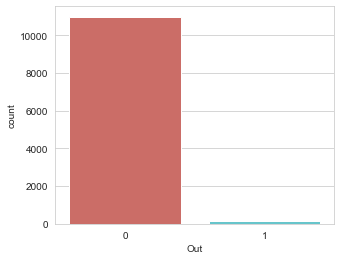

In [453]:
sb.countplot(x = 'Out', data = balls_info, palette = 'hls')

### Checking and Taking Care of Missing/Unreasonable Values

In [454]:
balls_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11135 entries, 0 to 11134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Format         11135 non-null  object
 1   Game Location  11135 non-null  object
 2   Line           11135 non-null  object
 3   Length         11135 non-null  object
 4   Location       11135 non-null  object
 5   Speed          11135 non-null  int64 
 6   Bowling Style  10934 non-null  object
 7   Bounce         11135 non-null  object
 8   Out            11135 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 783.1+ KB


In [455]:
# Want to remove the data where bowling style is null (in this case, the speed will be -1)
balls_info.dropna(inplace = True)

In [456]:
# We don't want any null values
balls_info.isnull().sum()

Format           0
Game Location    0
Line             0
Length           0
Location         0
Speed            0
Bowling Style    0
Bounce           0
Out              0
dtype: int64

In [457]:
len(balls_info[balls_info['Speed'] == -1])

54

In [458]:
# Removing the rows where speed is not found
balls_info.drop(balls_info[balls_info['Speed'] == -1].index, inplace = True)

In [459]:
len(balls_info[balls_info['Speed'] == -1])

0

In [460]:
# Notice how the minimum for Speed is 0 which doesn't make sense
balls_info.describe()

,Speed,Out
count,1.088000e+04,10880.000000
mean,3.445753e+02,0.013419
std,1.593081e+04,0.115066
min,0.000000e+00,0.000000
25%,8.300000e+01,0.000000
50%,1.260000e+02,0.000000
75%,1.370000e+02,0.000000
max,1.421000e+06,1.000000


In [461]:
# Removing the rows where the speed is 0
balls_info.drop(balls_info[balls_info['Speed'] == 0].index, inplace = True)

In [462]:
# Still, the minimum for speed is 1 which doesn't make any sense
balls_info.describe()

,Speed,Out
count,1.086800e+04,10868.000000
mean,3.449557e+02,0.013434
std,1.593960e+04,0.115129
min,1.000000e+00,0.000000
25%,8.300000e+01,0.000000
50%,1.260000e+02,0.000000
75%,1.370000e+02,0.000000
max,1.421000e+06,1.000000


In [463]:
balls_info.drop(balls_info[balls_info['Speed'] == 1].index, inplace = True)

In [464]:
# Now all the values make sense
balls_info.describe()

,Speed,Out
count,1.086700e+04,10867.000000
mean,3.449874e+02,0.013435
std,1.594034e+04,0.115134
min,4.100000e+01,0.000000
25%,8.300000e+01,0.000000
50%,1.260000e+02,0.000000
75%,1.370000e+02,0.000000
max,1.421000e+06,1.000000


In [465]:
# After all these edits, we need to fix the index of balls_info
balls_info.index = np.arange(0, len(balls_info))

### Converting Categorical Variables to Dummy Indicators

In [466]:
# Since there are a fixed number of columns, we can use One Hot Encoding in this case
# Also the data isn't ordinal
balls_info['Format'].unique()

array(['Test', 'ODI', 'T20I'], dtype=object)

In [467]:
# There are too many options, but we reduce it to 6-7 options in the next cell so we can use One Hot Encoding
balls_info['Game Location'].unique()

array(['Hyderabad (Deccan)', 'Pune', 'Bengaluru', 'Ranchi', 'Kolkata',
       'Nagpur', 'Delhi', 'Rajkot', 'Visakhapatnam', 'Indore', 'Chennai',
       'Ahmedabad', 'Cuttack', 'Birmingham', 'The Oval', 'Mumbai',
       'Kanpur', 'Guwahati', 'Mumbai (BS)', 'Thiruvananthapuram',
       'Mohali', 'Southampton', 'Manchester', 'Leeds', 'Lauderhill',
       'Galle', 'Colombo (SSC)', 'Pallekele', 'Cape Town', 'Centurion',
       'Johannesburg', "Lord's", 'Nottingham', 'Adelaide', 'Perth',
       'Melbourne', 'Sydney', 'North Sound', 'Kingston', 'Wellington',
       'Christchurch', 'Port of Spain', 'Dambulla', 'Colombo (RPS)',
       'Durban', 'Port Elizabeth', 'Napier', 'Mount Maunganui',
       'Hamilton', 'Auckland', 'Canberra', 'Dublin (Malahide)', 'Cardiff',
       'Bristol', 'Brisbane', 'Providence'], dtype=object)

In [468]:
# Changing Game Location to countries
for i in range(0, len(balls_info)):
    india = ['hyderabad (deccan)', 'pune', 'bengaluru', 'ranchi', 'kolkata',
       'nagpur', 'delhi', 'rajkot', 'visakhapatnam', 'indore', 'chennai',
       'ahmedabad', 'mumbai', 'thiruvananthapuram', 'cuttack', 'kanpur', 'guwahati',
       'mumbai (bs)', 'mohali']
    sri_lanka = ['colombo (rps)', 'galle', 'colombo (ssc)', 'pallekele', 'dambulla']
    england = ['birmingham', 'the oval', 'southampton', 'manchester', 'leeds',
               'lord\'s', 'nottingham', 'bristol', 'dublin (malahide)', 'cardiff']
    usa = ['lauderhill']
    south_africa = ['cape town', 'centurion', 'johannesburg', 'durban', 
                    'port elizabeth']
    australia = ['adelaide', 'perth', 'melbourne', 'sydney', 'canberra', 'brisbane']
    west_indies = ['north sound', 'kingston', 'providence']
    new_zealand = ['wellington', 'christchurch', 'port of spain', 'napier', 
                   'mount maunganui', 'hamilton', 'auckland']
    
    currentLoc = balls_info['Game Location'].iloc[i].lower()
    
    if (india.__contains__(currentLoc)):
        balls_info['Game Location'].iloc[i] = 'India'
    elif (sri_lanka.__contains__(currentLoc)):
        balls_info['Game Location'].iloc[i] = 'Sri Lanka'
    elif (england.__contains__(currentLoc)):
        balls_info['Game Location'].iloc[i] = 'England'
    elif (usa.__contains__(currentLoc)):
        balls_info['Game Location'].iloc[i] = 'USA'
    elif (south_africa.__contains__(currentLoc)):
        balls_info['Game Location'].iloc[i] = 'South Africa'
    elif (australia.__contains__(currentLoc)):
        balls_info['Game Location'].iloc[i] = 'Australia'
    elif (west_indies.__contains__(currentLoc)):
        balls_info['Game Location'].iloc[i] = 'West Indies'
    elif (new_zealand.__contains__(currentLoc)):
        balls_info['Game Location'].iloc[i] = 'New Zealand'
        
balls_info['Game Location'].unique()

c:\Users\Mohit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array(['India', 'England', 'USA', 'Sri Lanka', 'South Africa',
       'Australia', 'West Indies', 'New Zealand'], dtype=object)

In [469]:
# We can use One Hot Encoding in this case because there are not too many choices
# The data isn't ordinal either
balls_info['Line'].unique()

array(['Wide Outside Off', 'Middle Stump', 'Offside', 'Off Stump',
       'Leg Stump', 'Legside'], dtype=object)

In [470]:
# Here also we can use One Hot Encoding as the data is not ordinal and there are only 4 choices
balls_info['Length'].unique()

array(['Short', 'Full', 'Good', 'Back of a Length'], dtype=object)

In [471]:
# Too many options so we shouldn't use One Hot Encoding
balls_info['Location'].unique()

array(['Point', 'Midwicket', 'Long-off', 'Wicketkeeper', 'Covers',
       'Offside', 'Deep Square Leg', 'Square Leg', 'Close', 'Mid-On',
       'Long Leg', 'Mid-Off', 'Deep Point', 'Legside', 'Long-on',
       'Short Leg', 'Extra Cover', 'Third Man', 'Deep Midwicket',
       'Sweeper', 'Gully', 'First slip', 'Fine Leg', 'Second slip',
       'Short Third Man', 'Short Fine Leg'], dtype=object)

In [472]:
# Again, too many options but we do reduce the options to 6 in the next cell so we can use One Hot Encoding
balls_info['Bowling Style'].unique()

array(['Right arm Offbreak', 'Right-arm fast', 'Right-arm medium-fast',
       'Slow Left arm Orthodox', 'Legbreak', 'Left-arm fast',
       'Slow left-arm orthodox', 'Right arm Fast medium',
       'Right arm Fast', 'Right-arm fast-medium', 'Right-arm medium',
       'Right-arm offbreak', 'Right arm Medium', 'Slow left-arm chinaman',
       'Right arm Medium fast', 'Right-arm offbreak, Legbreak',
       'Left-arm fast-medium', 'Left arm Fast', 'Legbreak googly',
       'Left arm Fast medium', 'Left-arm medium-fast',
       'Left arm Medium fast', 'Right arm Offbreak, Legbreak',
       'Legbreak Googly'], dtype=object)

In [473]:
# Removing Duplicates from Bowling Style and condensing it
# We already got the speeds so we can generalize all the bowling styles
for i in range(0, len(balls_info)):
    right_arm_offbreak = ['right arm offbreak', 'right-arm offbreak']
    right_arm_fast = ['right arm fast medium', 'right arm medium', 'right-arm fast-medium', 'right-arm medium-fast', 'right arm fast', 'right-arm fast', 'right-arm medium', 'right arm medium fast']
    right_arm_legbreak = ['legbreak', 'legbreak googly']
    left_arm_offbreak = ['slow left-arm orthodox', 'slow left arm orthodox']
    left_arm_fast = ['left-arm fast', 'left-arm fast-medium', 'left arm fast', 'left arm fast medium', 'left arm medium fast', 'left-arm medium-fast']
    left_arm_legbreak = ['slow left-arm chinaman']
    
    currentStyle = balls_info['Bowling Style'].iloc[i].lower()
    
    if (right_arm_offbreak.__contains__(currentStyle)):
        balls_info['Bowling Style'].iloc[i] = 'right arm offbreak'
    elif (right_arm_fast.__contains__(currentStyle)):
        balls_info['Bowling Style'].iloc[i] = 'right arm fast'
    elif (right_arm_legbreak.__contains__(currentStyle)):
        balls_info['Bowling Style'].iloc[i] = 'right arm legbreak'
    elif (left_arm_offbreak.__contains__(currentStyle)):
        balls_info['Bowling Style'].iloc[i] = 'left arm offbreak'
    elif (left_arm_fast.__contains__(currentStyle)):
        balls_info['Bowling Style'].iloc[i] = 'left arm fast'
    elif (left_arm_legbreak.__contains__(currentStyle)):
        balls_info['Bowling Style'].iloc[i] = 'left arm legbreak'
    else:
        balls_info['Bowling Style'].iloc[i] = np.random.choice(['right arm offbreak', 'right arm legbreak'])
        
balls_info['Bowling Style'].unique()

array(['right arm offbreak', 'right arm fast', 'left arm offbreak',
       'right arm legbreak', 'left arm fast', 'left arm legbreak'],
      dtype=object)

In [474]:
# Only a few options for this but this could be ordinal data so we shouldn't use One Hot Encoding
balls_info['Bounce'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

In [475]:
label_encoder = LabelEncoder()
binary_encoder = OneHotEncoder(categories = 'auto')

In [476]:
# Converting Format Feature to Binary Features
format_categorical = balls_info['Format']
format_encoded = label_encoder.fit_transform(format_categorical)

format_1hot = binary_encoder.fit_transform(format_encoded.reshape(-1, 1))
format_1hot_matrix = format_1hot.toarray()
format_df = pd.DataFrame(format_1hot_matrix, columns = ['ODI', 'T20', 'Test'])
format_df.head()

,ODI,T20,Test
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [477]:
# Converting Game Location Feature to Binary Features
game_location_categorical = balls_info['Game Location']
game_location_encoded = label_encoder.fit_transform(game_location_categorical)

game_location_1hot = binary_encoder.fit_transform(game_location_encoded.reshape(-1, 1))
game_location_1hot_matrix = game_location_1hot.toarray()
game_location_df = pd.DataFrame(game_location_1hot_matrix, columns = ['Australia', 'England', 'India', 'New Zealand', 'South Africa',
       'Sri Lanka', 'USA', 'West Indies'])
game_location_df.head()

,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,West Indies
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [478]:
# Converting Line Feature to Binary Features
line_categorical = balls_info['Line']
line_encoded = label_encoder.fit_transform(line_categorical)

line_1hot = binary_encoder.fit_transform(line_encoded.reshape(-1, 1))
line_1hot_matrix = line_1hot.toarray()
line_df = pd.DataFrame(line_1hot_matrix, columns = ['Line: Leg Stump', 'Line: Legside', 'Line: Middle Stump', 'Line: Off Stump', 'Line: Offside', 'Line: Wide Outside Off'])
line_df.head()

,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [479]:
# Converting Length Feature to Binary Features
length_categorical = balls_info['Length']
length_encoded = label_encoder.fit_transform(length_categorical)

length_1hot = binary_encoder.fit_transform(length_encoded.reshape(-1, 1))
length_1hot_matrix = length_1hot.toarray()
length_df = pd.DataFrame(length_1hot_matrix, columns = ['Length: Back of a Length', 'Length: Full', 'Length: Good', 'Length: Short'])
length_df.head()

,Length: Back of a Length,Length: Full,Length: Good,Length: Short
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [480]:
# Converting Location Feature to Numbers
location_categorical = balls_info['Location']
location_encoded = label_encoder.fit_transform(location_categorical)
location_encoded[0:10]

array([17, 15, 11, 25,  1, 16,  4, 15, 22,  0])

In [481]:
# The indexes are the encoded values for each of the locations
label_encoder.classes_

array(['Close', 'Covers', 'Deep Midwicket', 'Deep Point',
       'Deep Square Leg', 'Extra Cover', 'Fine Leg', 'First slip',
       'Gully', 'Legside', 'Long Leg', 'Long-off', 'Long-on', 'Mid-Off',
       'Mid-On', 'Midwicket', 'Offside', 'Point', 'Second slip',
       'Short Fine Leg', 'Short Leg', 'Short Third Man', 'Square Leg',
       'Sweeper', 'Third Man', 'Wicketkeeper'], dtype=object)

In [482]:
# Converting Bowling Style Feature to Binary Features
bowling_style_categorical = balls_info['Bowling Style']
bowling_style_encoded = label_encoder.fit_transform(bowling_style_categorical)

bowling_style_1hot = binary_encoder.fit_transform(bowling_style_encoded.reshape(-1, 1))
bowling_style_1hot_matrix = bowling_style_1hot.toarray()
bowling_style_df = pd.DataFrame(bowling_style_1hot_matrix, columns = ['left arm fast', 'left arm legbreak', 'left arm offbreak',
       'right arm fast', 'right arm legbreak', 'right arm offbreak'])

In [483]:
# Converting Bounce Feature to Numbers
bounce_categorical = balls_info['Bounce']
bounce_encoded = label_encoder.fit_transform(bounce_categorical)
bounce_encoded[0:10]

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [484]:
# The indexes are encoded values for each of the bounce increments
label_encoder.classes_

array(['High', 'Low', 'Normal'], dtype=object)

In [485]:
# Getting the list of the Speed Column so we can add it in the order we want into the balls_info dataframe
speed = balls_info['Speed'].to_list()
speed[0:10]

[70, 141, 144, 147, 148, 92, 70, 86, 82, 71]

In [486]:
# Getting the list of the Out Column so we can add it in the order we want into the balls_info dataframe
out = balls_info['Out'].to_list()
out[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [487]:
# Removing all the features that are going to be revised
balls_info.drop(['Format'], axis = 1, inplace = True)
balls_info.drop(['Game Location'], axis = 1, inplace = True)
balls_info.drop(['Line'], axis = 1, inplace = True)
balls_info.drop(['Length'], axis = 1, inplace = True)
balls_info.drop(['Location'], axis = 1, inplace = True)
balls_info.drop(['Bowling Style'], axis = 1, inplace = True)
balls_info.drop(['Bounce'], axis = 1, inplace = True)

# Removing these so we can decide the order in which the columns appear in our dataframe
balls_info.drop(['Speed'], axis = 1, inplace = True)
balls_info.drop(['Out'], axis = 1, inplace = True)

In [488]:
# Adding all the features to the dataframe except Location
# Not adding Location because it is categorical data so we want to One Hot Encode it, but we cannot because it has too many options
# So, we may want to add it later if our model doesn't do well but there is a small chance that having that data will help anyway
balls_info = pd.concat([balls_info, format_df], axis = 1)
balls_info = pd.concat([balls_info, game_location_df], axis = 1)
balls_info = pd.concat([balls_info, bowling_style_df], axis = 1)
balls_info['Speed'] = speed
balls_info = pd.concat([balls_info, length_df], axis = 1)
balls_info = pd.concat([balls_info, line_df], axis = 1)
balls_info['Bounce'] = bounce_encoded
balls_info['Out'] = out
balls_info.columns # 30 features

Index(['ODI', 'T20', 'Test', 'Australia', 'England', 'India', 'New Zealand',
       'South Africa', 'Sri Lanka', 'USA', 'West Indies', 'left arm fast',
       'left arm legbreak', 'left arm offbreak', 'right arm fast',
       'right arm legbreak', 'right arm offbreak', 'Speed',
       'Length: Back of a Length', 'Length: Full', 'Length: Good',
       'Length: Short', 'Line: Leg Stump', 'Line: Legside',
       'Line: Middle Stump', 'Line: Off Stump', 'Line: Offside',
       'Line: Wide Outside Off', 'Bounce', 'Out'],
      dtype='object')

### Checking for Independence Between Features

<AxesSubplot:>

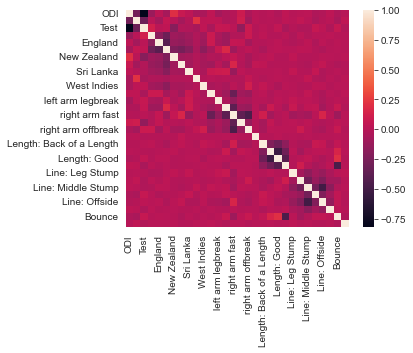

In [489]:
sb.heatmap(balls_info.corr())

In [490]:
# ODI and Test have high correlation but that doesn't matter because they are part of the same feature which we broke up
# Line: Middle Stump and Line: Offisde have moderate correlation but doesn't matter because they are part of the same initial feature
# Length: Full and Length: Good have high correlation but doesn't matter because they are part of the same initial feature
# Bounce and Length: Short is correlated so we can remove Bounce since that feature isn't that important
balls_info.drop(['Bounce'], axis = 1, inplace = True)

### Checking if the Dataset Size is Sufficient

In [491]:
# Logistic Regression assumes that you have at least 50 values per predictive feature
# There are 29 - 1 = 28 features
len(balls_info.columns)

29

In [492]:
# 28 * 50 = 1400 rows need to be there
balls_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10867 entries, 0 to 10866
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ODI                       10867 non-null  float64
 1   T20                       10867 non-null  float64
 2   Test                      10867 non-null  float64
 3   Australia                 10867 non-null  float64
 4   England                   10867 non-null  float64
 5   India                     10867 non-null  float64
 6   New Zealand               10867 non-null  float64
 7   South Africa              10867 non-null  float64
 8   Sri Lanka                 10867 non-null  float64
 9   USA                       10867 non-null  float64
 10  West Indies               10867 non-null  float64
 11  left arm fast             10867 non-null  float64
 12  left arm legbreak         10867 non-null  float64
 13  left arm offbreak         10867 non-null  float64
 14  right 

# Saving the Prepared Dataframe as CSV for ML

In [493]:
balls_info.to_csv('Prepared_for_ML_Data.csv')